# Computational Learning HW2 

### Import useful packeges

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# sklearn imports
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import pipeline
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

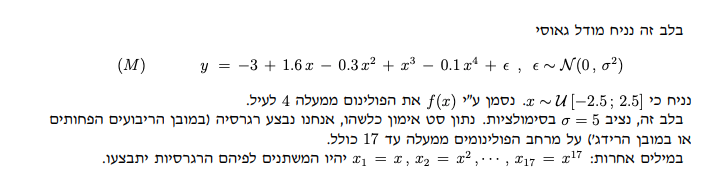

### Global Variabels and Functions

In [ ]:
def create_dataframe(observarion_number = 100000, test_data = False):
  """Create a data frame using the global variabels and M model assumptions

  Parameters
  ----------
  observarion_number : int
      number of observation to generate
  test_data : bool
      determines if the function create test data
  
  Returns
  -------
  DataFrame
      a data frame with N (observarion_number) training set containing X1,X2,...,X17,Y,Fx columns
  """

  data = {}

  #create train data
  if test_data is False:

    # creating uniform distributed data points
    x1 = np.random.uniform(-2.5,2.5,observarion_number)
    data['X1'] = x1

  #insert the global variable test_observation
  else:
    x1 = test_observation
    data['X1'] = x1

  # generate 17 vectors x2,x3,..,x17
  for i in range(2,18):
    data['X{}'.format(i)] = x1**i

  # creating noise observation distributed normal with mean = 0 and sd = sigma
  epsilon = np.random.normal(0,sigma,observarion_number)

  # creating the theoretical function F =-3 + 1.6*x - 0.3*x**2 + x**3 - 0.1*x**4 
  F = np.poly1d([-0.1,  1, -0.3, 1.6, -3]) # real model
  Fx = F(x1)
  data['Fx'] = Fx

  # creating the theotetical observations   
  Y = Fx + epsilon
  data['Y'] = Y
  
  return pd.DataFrame(data)

Constants :

In [ ]:
  sigma = 5 
  # in order not to calculate in each time test_observation and divide them, since they the same, I took them out from TSE function below
  test_observation = np.linspace(-2.5,2.5,10**5)
  # create test data frame
  test_df = create_dataframe(100000)
  # divide observation's test data 
  X_test = test_df.iloc[:,:17]
  Y_test = test_df.iloc[:,18]

### Q1

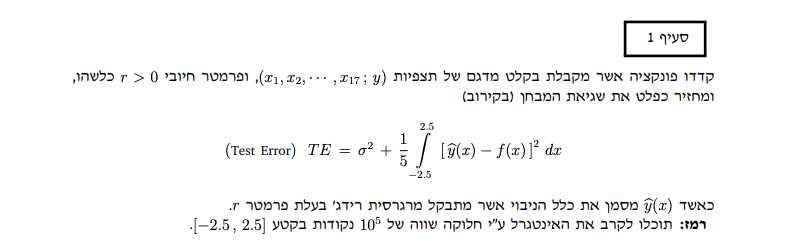

In [ ]:
def TSE(observations,lagrangian_parameter):
  """Calculate a Ridge model using the observations and lagrangian_parameter inputs 
  and determines test error on test_observation(constant variable)

  Parameters
  ----------
  observations : DataFrame
      data frame generated from create_dataframe function
  lagrangian_parameter : int
      squared euclidean norm L2
  
  Returns
  -------
  float
      Mean Squared Error
  """

  # divide observation's data frame
  X_train = observations.iloc[:,:17]
  Y_train = observations.iloc[:,18]

  # Linear model fitted by minimizing a regularized empirical loss 
  ridge_reg = Ridge(alpha=lagrangian_parameter)

  # normalize the observations and fitted the model
  model = pipeline.make_pipeline(preprocessing.StandardScaler(), ridge_reg).fit(X_train, Y_train)

  # standardize the data attributes
  standardized_X_test = preprocessing.scale(X_test)

  # predict Y_test using ridge model 
  Y_test_Predictions = model.predict(standardized_X_test)

  # calculate Test Erorr
  error = np.mean((Y_test_Predictions-Y_test)**2)

  return error

In [ ]:
TSE(create_dataframe(250),0.001)

65.87261800476942

### Q2

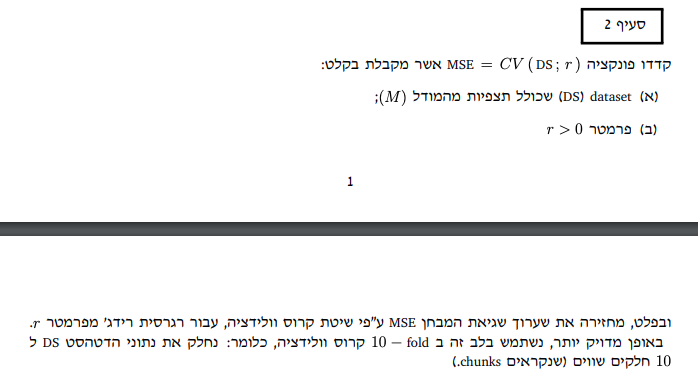

In [ ]:
def CV(observations,lagrangian_parameter):
  """Estimated TSE using 10-Fold cross-validation on Ridge model

  Parameters
  ----------
  observations : DataFrame
      data frame generated from create_dataframe function
  lagrangian_parameter : int
      squared euclidean norm L2
  
  Returns
  -------
  float
      Average Mean Squared Error
  """

  # divide observation's data frame
  X_train = observations.iloc[:,:17]
  Y_train = observations.iloc[:,18]

  # Linear model fitted by minimizing a regularized empirical loss
  model = Ridge(alpha=lagrangian_parameter)
  
  # standardize the data attributes
  standardized_X = preprocessing.scale(X_train)

  # prepare the cross-validation procedure
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  # evaluate models
  score = (cross_val_score(model, standardized_X, Y_train, cv=cv,scoring='neg_mean_squared_error', n_jobs=-1)*-1).mean()
  
  return score

### Q3

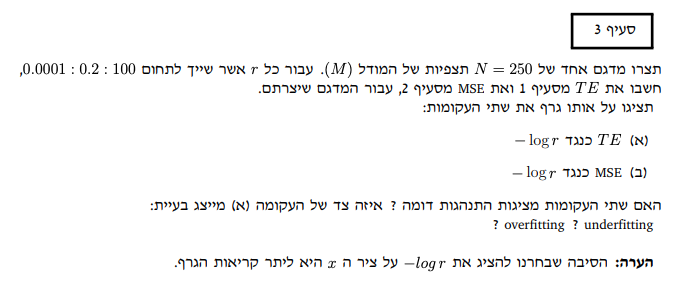

In [ ]:
#Data frame with N (observarion_number) training
Q3_observations = create_dataframe(250)

lagrangian_parameters = list(np.linspace(0.0001,0.2,100))

TSE_results = []
CV_results = []

#For each lagrangian parameter we are creating the TSE and CV 
for lagrangian_parameter in lagrangian_parameters:
  TSE_results.append(TSE(Q3_observations,lagrangian_parameter))
  CV_results.append(CV(Q3_observations,lagrangian_parameter))

#The datafram of r,CV and TSE
Q3_df = pd.DataFrame(list(zip(lagrangian_parameters,TSE_results, CV_results)), columns =['r','TSE', 'CV'])
Q3_df['-log_r'] = Q3_df['r'].apply(lambda x: -1*np.log(x))
Q3_df

,r,TSE,CV,-log_r
0,0.000100,62.445277,27.893988,9.210340
1,0.002119,61.801443,27.405712,6.156720
2,0.004138,61.769272,27.328048,5.487450
3,0.006158,61.797507,27.284985,5.090072
4,0.008177,61.838614,27.255423,4.806458
...,...,...,...,...
95,0.191923,61.217000,26.908902,1.650660
96,0.193942,61.203938,26.907470,1.640194
97,0.195962,61.190918,26.906052,1.629836
98,0.197981,61.177939,26.904647,1.619585


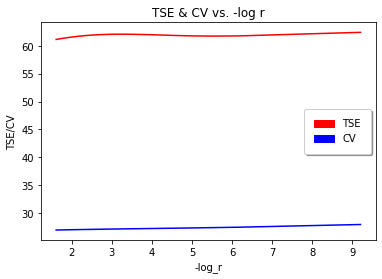

In [ ]:

plt.plot(Q3_df['-log_r'], Q3_df['TSE'], 'r-')
plt.plot(Q3_df['-log_r'],Q3_df['CV'], 'b-')
plt.xlabel('-log_r')
plt.ylabel('TSE/CV')
red_patch = mpatches.Patch(color='red', label='TSE')
blue_patch = mpatches.Patch(color='blue', label='CV')
plt.title('TSE & CV vs. -log r').
plt.legend(handles=[red_patch,blue_patch],fancybox=True, loc='middle right', framealpha=1, shadow=True, borderpad=1)

The graphs are showing similar behavior.
CV changed the absolute number of the results but kept the trend. 
We see an example of **overfitting** before the break, while we observe **underfitting** after some values (when the lagrangian parameters increased too much). 


### Q4

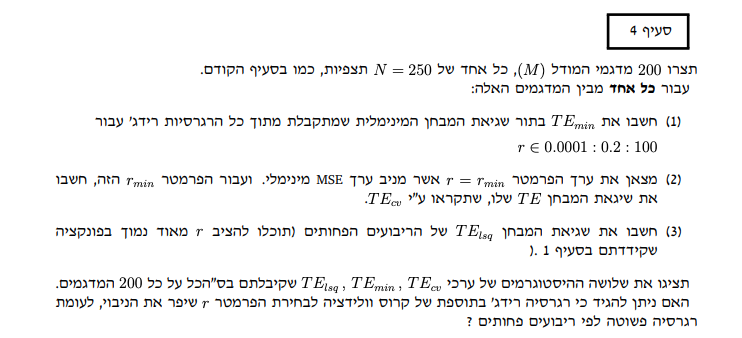

In [ ]:
def Q4_models(lagrangian_parameters):
  """Create the model for Q4

  Parameters
  ----------
  lagrangian_parameter : int
      squared euclidean norm L2
  
  Returns
  -------
  DataFrame
      data frame with coulmns r,TSE and CV
  """
  #data frame with N (observarion_number) training
  observations = create_dataframe(250)
  
  TSE_results = []
  CV_results = []

  #For each lagrangian parameter we are creating the TSE and CV 
  for lagrangian_parameter in lagrangian_parameters:
    TSE_results.append(TSE(observations,lagrangian_parameter))
    CV_results.append(CV(observations,lagrangian_parameter))

  df = pd.DataFrame(list(zip(lagrangian_parameters,TSE_results, CV_results)), columns =['r','TSE', 'CV'])
  return df

In [ ]:
lagrangian_parameters = list(np.linspace(0.0001,0.2,100))

In [ ]:
lst_of_models=[]
#Create 200 models 
while len(lst_of_models)<200:
  lst_of_models.append(Q4_models(lagrangian_parameters))

In [ ]:
dic_of_tse_min={}
dic_of_cv_r_min={}
dic_of_tse_lsq_min={}

for x,i in enumerate(lst_of_models):
  dic_of_tse_min[x]= i['TSE'].min()
  #dic_of_tse_min[str(x)+'r']=i['r'].loc[i['TSE'] == (i['TSE'].min())].item()

for x,i in enumerate(lst_of_models):
  dic_of_cv_r_min[x]=i['CV'].loc[i['TSE'] == (i['TSE'].min())].item()

tse_lsq_min=Q4_models(list(np.linspace(0.000000000001,0000000.1,100)))

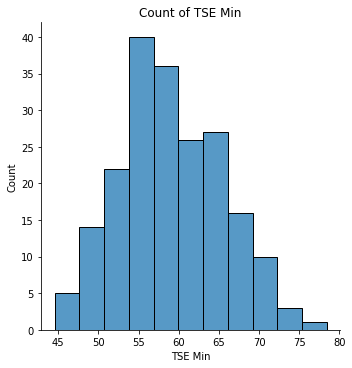

In [ ]:
tse_min=pd.DataFrame(dic_of_tse_min.items(),columns=['Index','TSE Min'])
tse_min_plot=sns.displot(tse_min, x='TSE Min')
plt.title("Count of TSE Min")
tse_min_plot

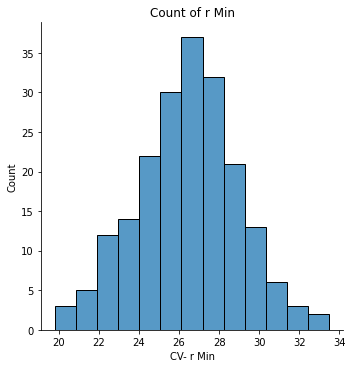

In [ ]:
cv_r_min=pd.DataFrame(dic_of_cv_r_min.items(),columns=['Index','CV- r Min'])
cv_r_min_plot=sns.displot(cv_r_min, x='CV- r Min')
plt.title("Count of r Min")
cv_r_min_plot


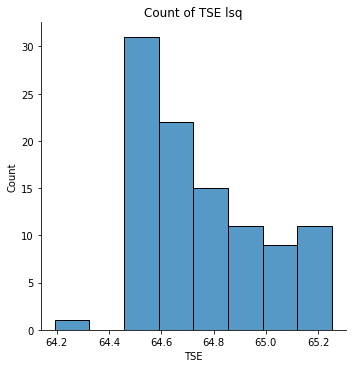

In [ ]:

tse_lsq_min_plot=sns.displot(tse_lsq_min, x='TSE')
plt.title("Count of TSE lsq")
tse_lsq_min_plot

The first histogram shows a very close distribution like a normal distribution around the value of 60.

The second histogram shows a normal distribution around the value of 26.

On the last histogram, we see that all the results are greater than 64.

This histogram show clearly that the ridge and cv improve significantly the results. The highest error on the second histogram is less than 34. The lower value on the other histograms is 45. There is no doubt then that the improvement is great.